# Project - classification of chocolate bars
Ocheretian Kateryna

In [41]:

import glob
import time
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD, Adagrad, Adadelta, Adam
from tensorflow.keras import metrics
from tensorflow.keras import losses

# Resize all fotos
I took photos of each bar on 6 different backgrass
then resize them from (3368, 6000) to (168, 300)

In [42]:
# PATH = 'dataset/'
# PATH2 = 'd/'
#
# for index in [9, 10, 11, 12]:
#
#     print("index - ", index)
#
#     # READ
#     cv_img = []
#     i = 1
#
#     for img in glob.glob(PATH + str(index) + '/*.JPG'):
#         print(i)
#
#         image= cv2.imread(img)
#         image = np.array(image)
#         # print("shape = ", image.shape)
#
#         # RESIZE
#         scale_percent = 5 # percent of original size
#         width = int(image.shape[1] * scale_percent / 100)
#         height = int(image.shape[0] * scale_percent / 100)
#
#         image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
#
#         # print("new shape = ", image.shape)
#
#         # SAVE
#         u = cv2.imwrite(PATH2 + str(index)  + "/"+ str(i) +'.JPG', image)
#         i += 1
#         print(u)
print("done")S

done


# Preparing a dataset

In [43]:
PATH = 'd/'
class_names = ["Kinder", "Milka", "Bounty", "Twix", "Lion", "Snickers", "Roshen Red", "Roshen Green", "Crunchy", "Jeżyki", "Chałwa", "Chałwa kakaowa", "Mars"]

### Read images

In [44]:
X = []
Y = []

for folder in range(13):
    for img in glob.glob(PATH + str(folder) + '/*.JPG'):
        i = cv2.imread(img)
        X.append(i)
        Y.append(folder)

X = np.array(X)
Y = np.array(Y)

print("X.shape", X.shape)
print("Y.shape", Y.shape, Y)

X.shape (4006, 168, 300, 3)
Y.shape (4006,) [ 0  0  0 ... 12 12 12]


### show dataset information

the Dataset consists of:
number of classes: 13


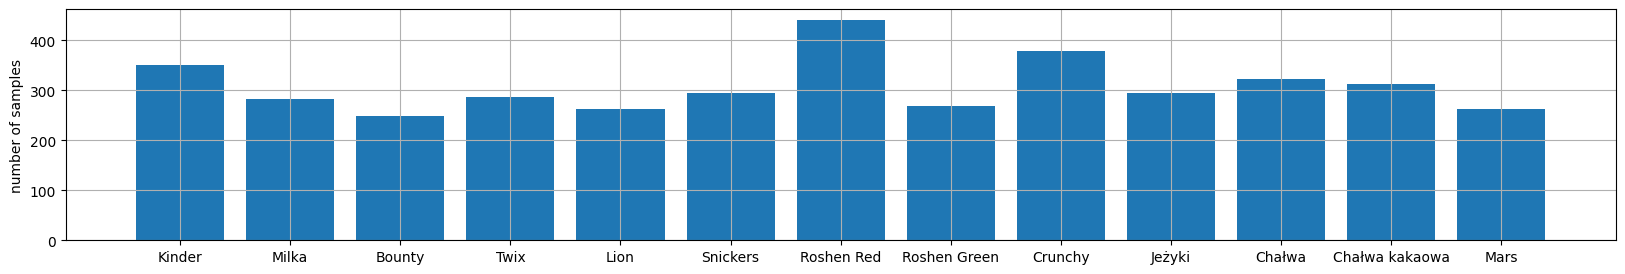

examples of samples of each class:


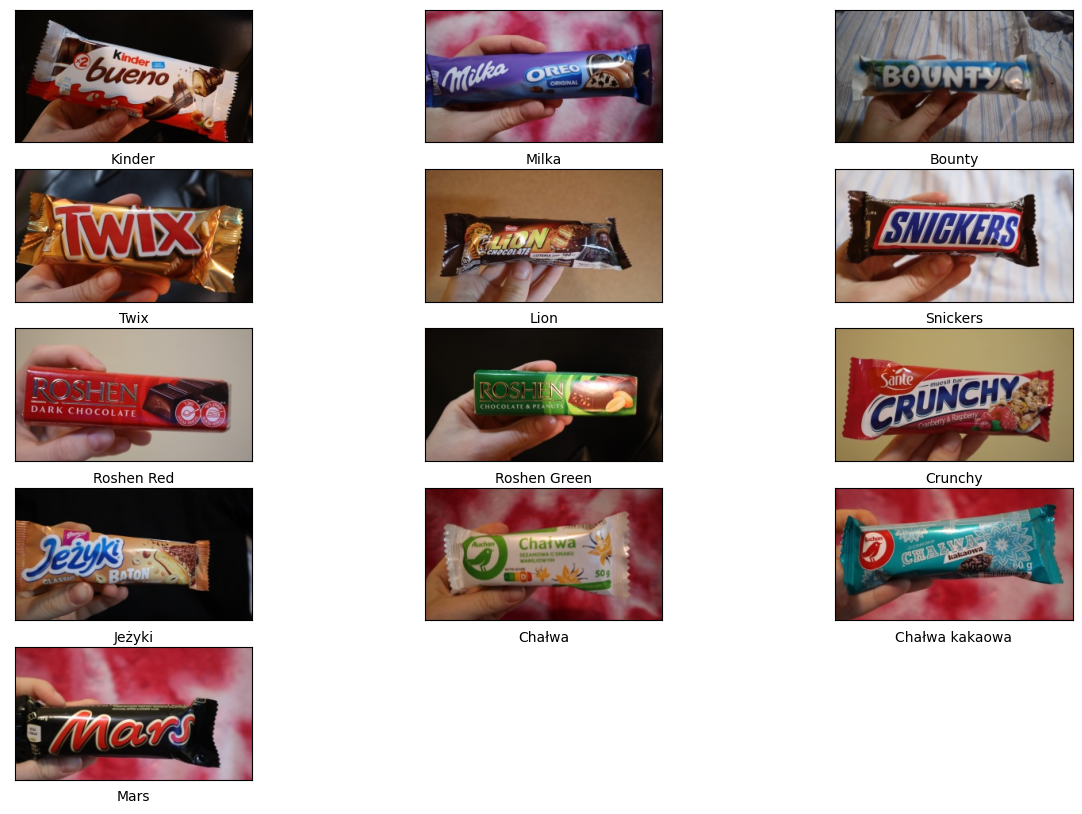

In [45]:
s = [np.count_nonzero(Y == i) for i in range(len(class_names))]

plt.figure(figsize = (20, 3))
print("the Dataset consists of:")
print("number of classes:", len(class_names))
plt.bar(class_names, s)
plt.grid()
plt.ylabel("number of samples")
plt.show()

print("examples of samples of each class:")

if 1 == 1:
    plt.figure(figsize = (15, 10))

    plt.subplot(5, 3, 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[0])
    plt.imshow(cv2.cvtColor(X[4], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[1])
    plt.imshow(cv2.cvtColor(X[380], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 3)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[2])
    plt.imshow(cv2.cvtColor(X[670], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[3])
    plt.imshow(cv2.cvtColor(X[890], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 5)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[4])
    plt.imshow(cv2.cvtColor(X[1290], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 6)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[5])
    plt.imshow(cv2.cvtColor(X[1490], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 7)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[6])
    plt.imshow(cv2.cvtColor(X[1790], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 8)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[7])
    plt.imshow(cv2.cvtColor(X[2190], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 9)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[8])
    plt.imshow(cv2.cvtColor(X[2790], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 10)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[9])
    plt.imshow(cv2.cvtColor(X[3090], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 11)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[10])
    plt.imshow(cv2.cvtColor(X[3190], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 12)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[11])
    plt.imshow(cv2.cvtColor(X[3590], cv2.COLOR_BGR2RGB))
    plt.subplot(5, 3, 13)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(class_names[12])
    plt.imshow(cv2.cvtColor(X[3990], cv2.COLOR_BGR2RGB))
plt.show()

### scale the data between 0 and 1

In [46]:
# Normalize pixel values to be between 0 and 1
X = X.astype('float32')
X /= 255
print(X.shape, X[0])

(4006, 168, 300, 3) [[[0.26666668 0.3372549  0.4509804 ]
  [0.20784314 0.2784314  0.39215687]
  [0.28235295 0.3529412  0.46666667]
  ...
  [0.29803923 0.3529412  0.4627451 ]
  [0.38431373 0.4392157  0.54901963]
  [0.34901962 0.40392157 0.5137255 ]]

 [[0.25490198 0.3254902  0.4392157 ]
  [0.18039216 0.2509804  0.3647059 ]
  [0.24313726 0.3137255  0.42745098]
  ...
  [0.25882354 0.3137255  0.42352942]
  [0.38039216 0.43529412 0.54509807]
  [0.3647059  0.41960785 0.5294118 ]]

 [[0.2784314  0.34901962 0.4627451 ]
  [0.23529412 0.30588236 0.41960785]
  [0.27450982 0.34509805 0.45882353]
  ...
  [0.16470589 0.21960784 0.32941177]
  [0.23921569 0.29411766 0.40392157]
  [0.30980393 0.3647059  0.4745098 ]]

 ...

 [[0.09411765 0.15294118 0.25490198]
  [0.08235294 0.14117648 0.24313726]
  [0.07843138 0.14509805 0.2509804 ]
  ...
  [0.05882353 0.10196079 0.18039216]
  [0.07450981 0.11764706 0.19607843]
  [0.04705882 0.09019608 0.16862746]]

 [[0.09019608 0.14117648 0.24313726]
  [0.06666667 0.1

### One-hot encoding

In [47]:
## One-hot encoding
Y = keras.utils.to_categorical(Y, len(class_names))
print(Y.shape, Y[0])

(4006, 13) [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### split dataset

In [48]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42, shuffle = True, stratify = Y)

print("               X               Y")
print("train", X_train.shape, "  ", y_train.shape)
print(" test", X_test.shape, "   ", y_test.shape)

print("\nTrain set: ", X_train.shape[0], "samples")
print("Test set:  ", X_test.shape[0], "samples")

               X               Y
train (3204, 168, 300, 3)    (3204, 13)
 test (802, 168, 300, 3)     (802, 13)

Train set:  3204 samples
Test set:   802 samples


# CNN model

### create model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 164, 296, 128)     9728      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 98, 128)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 54, 98, 128)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 50, 94, 64)        204864    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 31, 64)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 16, 31, 64)       

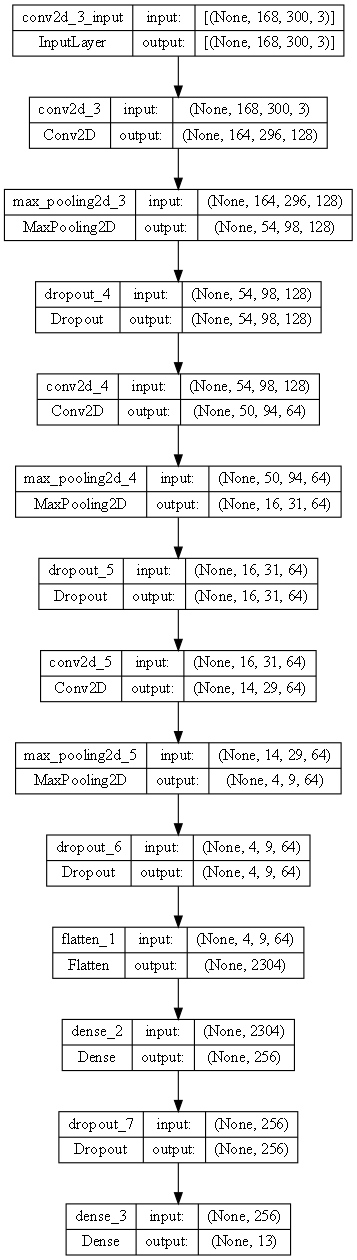

In [49]:
model = Sequential([
    Conv2D(128, (5, 5), activation = 'relu', input_shape = (168, 300, 3)),
    MaxPooling2D((3, 3), strides = (3, 3)),
    Dropout(0.25),

    Conv2D(64, (5, 5), activation = 'relu'),
    MaxPooling2D((3, 3), strides = (3, 3)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation = 'relu'),
    MaxPooling2D((3, 3), strides = (3, 3)),
    Dropout(0.25),

    Flatten(),
    Dense(256, activation = 'relu'),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax'),
])

model.summary()
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 80)

### Compile + Fit

In [50]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=Adam(),
              metrics=[metrics.categorical_accuracy])

history = model.fit(X_train, y_train,
                    epochs = 3,
                    batch_size = 64,
                    validation_data = (X_test, y_test))
history.history.keys()

Epoch 1/3
51/51 [==============================] - 211s 4s/step - loss: 1.5652 - categorical_accuracy: 0.4772 - val_loss: 0.2479 - val_categorical_accuracy: 0.9414
Epoch 2/3
51/51 [==============================] - 195s 4s/step - loss: 0.3313 - categorical_accuracy: 0.9039 - val_loss: 0.0662 - val_categorical_accuracy: 0.9913
Epoch 3/3
51/51 [==============================] - 198s 4s/step - loss: 0.1432 - categorical_accuracy: 0.9544 - val_loss: 0.0264 - val_categorical_accuracy: 0.9950


dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

### Evaluate

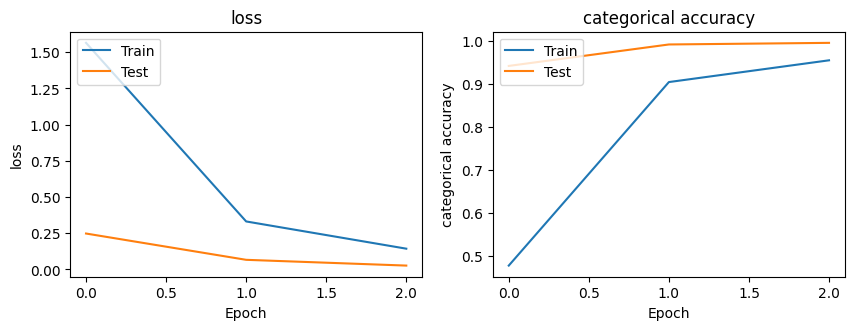

In [51]:
plt.figure(figsize = (10, 7))
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.subplot(2, 2, 2)
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('categorical accuracy')
plt.ylabel('categorical accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')

In [52]:

# Evaluate

print(model.evaluate(X_test, y_test))

26/26 [==============================] - 9s 357ms/step - loss: 0.0264 - categorical_accuracy: 0.9950
[0.026352282613515854, 0.9950124621391296]


In [53]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


# Test

### test on validation set

1/1 [==============================] - 0s 402ms/step


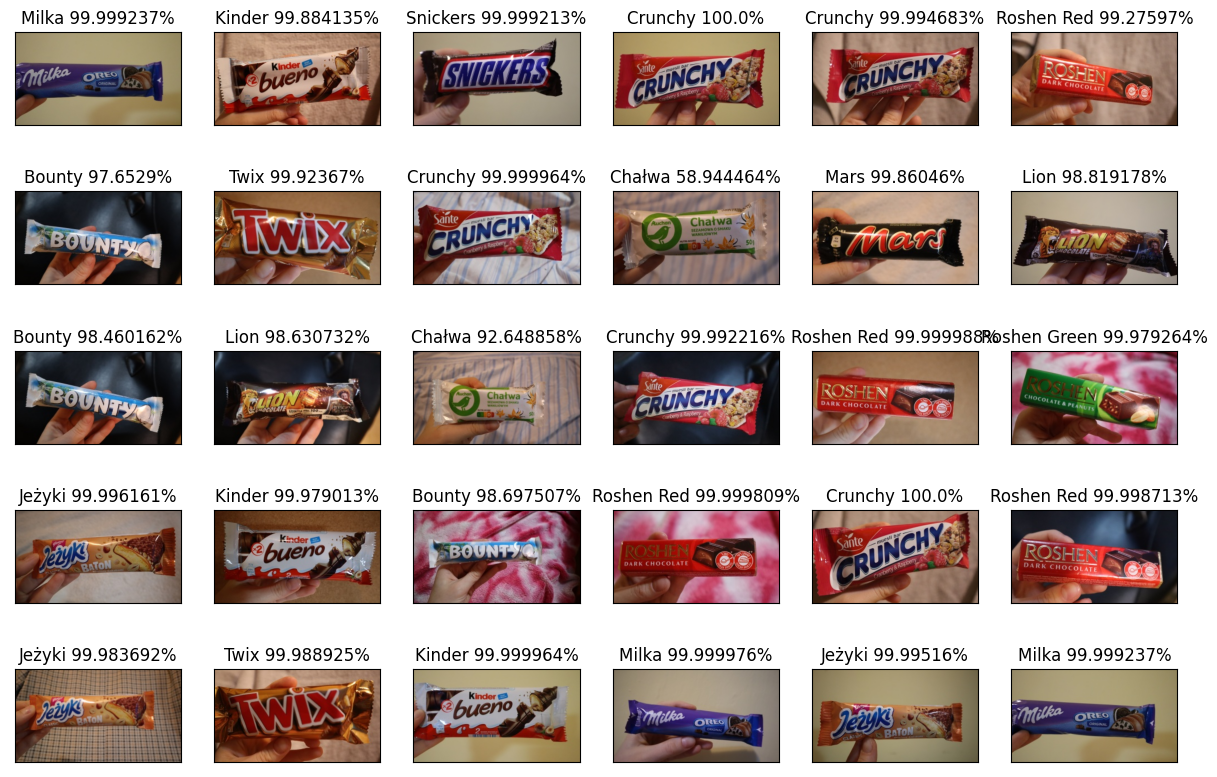

In [54]:
start = 70
end = start + (5*6)
pred = model.predict(X_test[start:end])
k = 0
plt.figure(figsize = (15, 10))

for number_image in range(start, end):
    plt.subplot(5, 6, k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(X_test[number_image], cv2.COLOR_BGR2RGB))
    arg = np.argmax(pred[k])
    plt.title(class_names[arg] + " " + str(round(pred[k][arg]*100, 6)) + "%")
    k +=1

plt.show()

=> all pictures are classified correctly

### test on image from internet

1/1 [==============================] - 0s 125ms/step


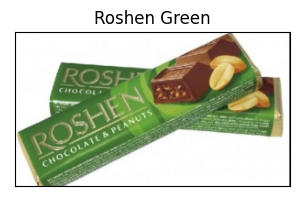

1/1 [==============================] - 0s 34ms/step


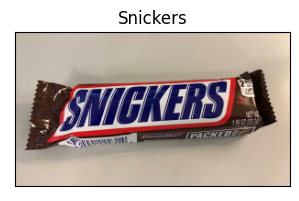

1/1 [==============================] - 0s 35ms/step


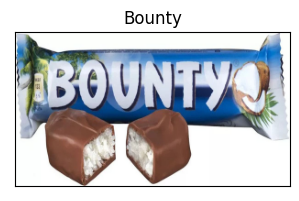

1/1 [==============================] - 0s 37ms/step


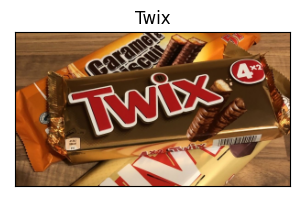

1/1 [==============================] - 0s 36ms/step


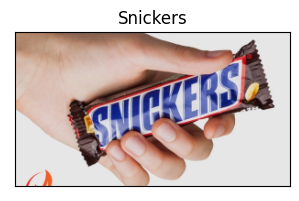

1/1 [==============================] - 0s 34ms/step


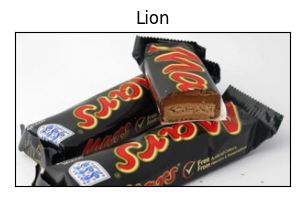

1/1 [==============================] - 0s 35ms/step


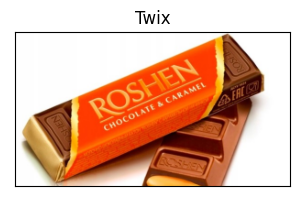

In [55]:

for img in glob.glob('d/test/*.jpg'):
    image = cv2.imread(img)
    image = np.array(image)
    plt.figure(figsize = (6, 2))
    image = cv2.resize(image,  (300, 168), interpolation = cv2.INTER_AREA)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    pred = model.predict(np.reshape(image, (1, 168, 300, 3)))

    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    arg = np.argmax(pred[0])
    # plt.title(class_names[arg] + " " + str(round(pred[0][arg]*100, 6)) + "%")
    plt.title(class_names[arg])
    plt.show()

=> mostly the pictures are classified correctly,
but if the bar is turned upside down, or lies vertically in the picture, or the bar has an old design -> then the network does not recognize it

## camera

In [40]:
vid = cv2.VideoCapture(1)

model = keras.models.load_model("model")

while (True):
    ret, image = vid.read()
    cv2.imshow('frame', image)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    if cv2.waitKey(1) & 0xFF == ord('f'):
        # print("foto")
        image = np.array(image)
        # print(image.shape)
        # RESIZE
        scale_percent = 50 # percent of original size
        width = int(image.shape[1] * scale_percent / 100)
        height = int(image.shape[0] * scale_percent / 100)

        image = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
        # print(image.shape)
        image = image[:168, :300]
        names = class_names[arg]
        # print(names + " " + str(round(pred[0][arg] * 100, 6)) + "%")

        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.xlabel(names)
        # plt.xlabel(names + " " + str(pred[0][arg] * 100) + "%")
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.show()
        time.sleep(1)


        vid.release()
        # print(image.shape)
#         image = cv2.resize(image, (300, 168), interpolation = cv2.INTER_AREA)

        pred = model.predict(np.reshape(image, (1, 168, 300, 3)))
        # print(pred)
        arg = np.argmax(pred[0])
cv2.destroyAllWindows()